## CS229 Machine Learning

### Project - Develop Face Mask detection algorithm for COVID-19

#### Models:
   - 1.  MLP
   - 2.  CNN

**Team Memerbs:**
   - Megala Anandakumar (06409804)
   - Mohammad Pournazeri (06487506)
   - Carlo Provenzani (06442416)
    

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**Import Libraries**

In [2]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

**Load Data**

In [2]:
#Loading the data
img_size = (200,200)

In [3]:
os.listdir('data/Project Data/ms1data')

['with_mask', 'without_mask']

In [4]:
mask_img_names = []
no_mask_img_names = []
mask_img = []
no_mask_img = []

In [5]:
def listfulldir(directory):
    files = os.listdir(directory)
    files = [os.path.join(directory,i) for i in files if i[0]!='.']
    return files

In [6]:
#Load Dataset 1
mask_img_names += listfulldir('data/Project Data/MOHAMMAD DATA/Results/With Mask')
no_mask_img_names += listfulldir('data/Project Data/MOHAMMAD DATA/Results/without mask')

In [7]:
#Load Dataset 2
mask_img_names += listfulldir('data/Project Data/CARLO DATA/mask_test-20201115T220910Z-001/mask_test')
mask_img_names += listfulldir('data/Project Data/CARLO DATA/mask_train-20201115T220842Z-001/mask_train')
no_mask_img_names += listfulldir('data/Project Data/CARLO DATA/no_mask_test-20201115T220903Z-001/no_mask_test')
no_mask_img_names += listfulldir('data/Project Data/CARLO DATA/no_mask_train-20201115T220916Z-001/no_mask_train')

In [8]:
#Load Dataset 3
mask_img_names += listfulldir('data/Project Data/ms1data/with_mask')
no_mask_img_names += listfulldir('data/Project Data/ms1data/without_mask')

In [9]:
print(len(no_mask_img_names),len(mask_img_names))

4316 24705


In [10]:
#Load Dataset 4 for no mask from https://susanqq.github.io/UTKFace/
utk_faces = listfulldir('data/Project Data/UTKFace')
n = len(mask_img_names)-len(no_mask_img_names)
no_mask_img_names += utk_faces[:n]

In [11]:
print(len(no_mask_img_names),len(mask_img_names))

24705 24705


**Resize Image**

In [12]:
def resize_image(img,size):
    s = max(img.shape[0:2])
    f = np.zeros((s,s,3),np.uint8)
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    f = cv2.resize(f,size)
    return f


In [13]:
print(no_mask_img_names[0])

data/Project Data/MOHAMMAD DATA/Results/without mask/image_434.jpg


In [14]:
images = mask_img_names + no_mask_img_names

In [15]:
labels = np.hstack((np.ones(len(mask_img_names)),np.zeros(len(no_mask_img_names))))

In [16]:
#images,labels = shuffle(images,labels)

In [17]:
print(len(images),len(labels))

49410 49410


In [18]:
X,Xt,Y,Yt = train_test_split(images,labels,train_size = .7,random_state=43)
#X,Y,Xt,Yt = np.array(X),np.array(Y),np.array(Xt),np.array(Yt)

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

### Model 1: MLP

In [20]:
mlp = Sequential()

In [21]:
mlp.add(Flatten())
mlp.add(Dense(1000,activation='relu'))
mlp.add(Dense(1,activation='sigmoid'))

In [22]:
mlp.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [23]:
batch_size = 32
epochs = 10

In [24]:
def generate_data(x,y,bs,do_shuffle = True):
    while True:
        if(do_shuffle):
            x,y = shuffle(x,y)
        for i in range(0,len(x),bs):
            xs = []
            x_images = x[i:i+bs]
            ys = y[i:i+bs]
            for j in range(len(ys)):
                img = cv2.imread(x_images[j])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = resize_image(img,img_size)
                img = img.astype('float32')/255 
                xs += [img]
            xs = np.array(xs,dtype='float32')
            yield xs,ys

In [25]:
train_generator = generate_data(X,Y,batch_size)
valid_generator = generate_data(Xt,Yt,batch_size)
spe = math.ceil(len(X)/batch_size)
spev = math.ceil(len(Xt)/batch_size)


In [26]:
mlp_history = mlp.fit_generator(train_generator,spe,epochs,validation_data=valid_generator,validation_steps = spev)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1081/1081 [==============================] - 182s 168ms/step - loss: 0.2768 - acc: 0.8934 - val_loss: 0.2028 - val_acc: 0.9254
Epoch 2/10
1081/1081 [==============================] - 158s 146ms/step - loss: 0.1950 - acc: 0.9279 - val_loss: 0.2302 - val_acc: 0.9138
Epoch 3/10
1081/1081 [==============================] - 156s 144ms/step - loss: 0.1723 - acc: 0.9363 - val_loss: 0.1774 - val_acc: 0.9333
Epoch 4/10
1081/1081 [==============================] - 157s 145ms/step - loss: 0.1565 - acc: 0.9419 - val_loss: 0.1629 - val_acc: 0.9424
Epoch 5/10
1081/1081 [==============================] - 155s 144ms/step - loss: 0.1447 - acc: 0.9471 - val_loss: 0.1853 - val_acc: 0.9280
Epoch 6/10
1081/1081 [==============================] - 157s 145ms/step - loss: 0.1345 - acc: 0.9498 - val_loss: 0.1552 - val_acc: 0.9450
Epoch 7/10
1081/1081 [==============================] - 157s 145ms/step - loss: 0.1252 - acc: 0.

In [27]:
mlp.save('mlp_model.h5')

In [28]:
def plot_accuracy_loss(model):  
    #training loss and training accuracy
    train_loss = model.history['loss']                # training loss
    train_acc = model.history['acc']                     # training accuracy  
    
    #valiation loss and validation accuracy
    val_loss = model.history['val_loss']                # val loss
    val_acc = model.history['val_acc']                     # val accuracy 
    
    
    #Training and Validation Accuracy
    plt.figure(figsize=(7,5))
    plt.plot(range(1, len(train_acc) + 1), train_acc, 'b', label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.title('Training and Validation Accuracy', fontsize =16)
    plt.xlabel('Epochs',fontsize='14')
    plt.ylabel('Training Accuracy',fontsize='14')
    plt.legend(loc = 'best')
    plt.show() 
    
    #Training and Validation Loss
    plt.figure(figsize=(7,5))
    plt.plot(range(1, len(train_loss) + 1), train_loss, 'b-', label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Training and Validation Loss', fontsize =16)
    plt.xlabel('Epochs',fontsize='14')
    plt.ylabel('Training Loss',fontsize='14')
    plt.legend(loc = 'best')
    plt.show() 

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def create_confusion_matrix(y, y_pred):   
    cm = confusion_matrix(y, y_pred)
    print(confusion_matrix)
    
    LABELS =  [] 
    fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
   # plt.figure(figsize =(4,4))
    #sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot =True, fmt='d',annot_kws={"size": 16} )
    sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot =True, fmt='d',annot_kws={"size": 16}, cmap='Blues')
    plt.title("Confusion Matrix", fontsize=16)
    plt.ylabel('True Class', fontsize=16)
    plt.xlabel('Predicted Class',fontsize=16)
    plt.show()
    
    cf = classification_report(y, y_pred)
    print(cf)

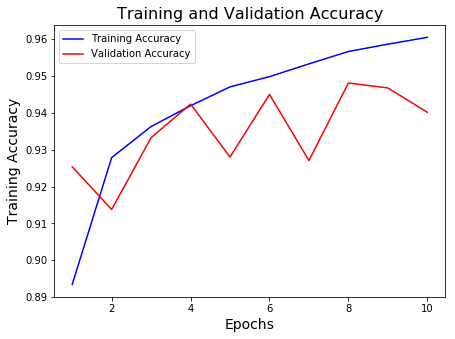

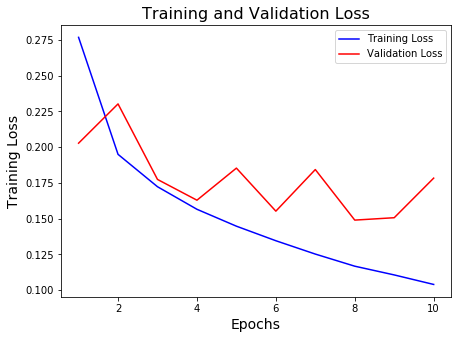

In [30]:
plot_accuracy_loss(mlp_history)

In [31]:
valid_generator = generate_data(Xt,Yt,batch_size,do_shuffle=False)
pred = mlp.predict(valid_generator,verbose=1,steps=spev)
pred = np.rint(pred)

464/464 [==============================] - 47s 100ms/step


<function confusion_matrix at 0x7f86c7a32488>


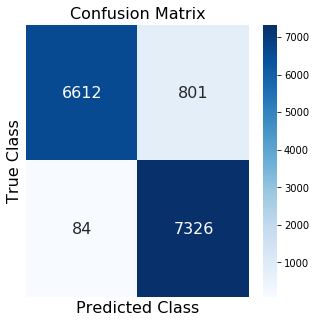

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      7413
         1.0       0.90      0.99      0.94      7410

    accuracy                           0.94     14823
   macro avg       0.94      0.94      0.94     14823
weighted avg       0.94      0.94      0.94     14823



In [32]:
create_confusion_matrix(Yt,pred)

In [33]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              120001000 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 120,002,001
Trainable params: 120,002,001
Non-trainable params: 0
_________________________________________________________________


### Model 1: CNN

In [50]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size[0],img_size[0],3)))
cnn.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn.add(Conv2D(16, kernel_size=3, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))

In [51]:
cnn.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [28]:
batch_size = 32
epochs = 10

In [30]:
def generate_data(x,y,bs,do_shuffle=True):
    while True:
        if do_shuffle:
            x,y = shuffle(x,y)
        for i in range(0,len(x),bs):
            xs = []
            x_images = x[i:i+bs]
            ys = y[i:i+bs]
            for j in range(len(ys)):
                img = cv2.imread(x_images[j])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = resize_image(img,img_size)
                img = img.astype('float32')/255 
                xs += [img]
            xs = np.array(xs,dtype='float32')
            yield xs,ys

In [32]:
train_generator = generate_data(X,Y,batch_size)
valid_generator = generate_data(Xt,Yt,batch_size)
spe = math.ceil(len(X)/batch_size)
spev = math.ceil(len(Xt)/batch_size)


In [55]:
cnn_history = cnn.fit_generator(train_generator,spe,epochs,validation_data=valid_generator,validation_steps = spev)

Epoch 1/10
1081/1081 [==============================] - 154s 142ms/step - loss: 0.3043 - acc: 0.8722 - val_loss: 0.2044 - val_acc: 0.9268
Epoch 2/10
1081/1081 [==============================] - 158s 146ms/step - loss: 0.1945 - acc: 0.9293 - val_loss: 0.1868 - val_acc: 0.9329
Epoch 3/10
1081/1081 [==============================] - 153s 141ms/step - loss: 0.1727 - acc: 0.9375 - val_loss: 0.1745 - val_acc: 0.9342
Epoch 4/10
1081/1081 [==============================] - 153s 142ms/step - loss: 0.1598 - acc: 0.9421 - val_loss: 0.1622 - val_acc: 0.9416
Epoch 5/10
1081/1081 [==============================] - 154s 143ms/step - loss: 0.1445 - acc: 0.9487 - val_loss: 0.1505 - val_acc: 0.9470
Epoch 6/10
1081/1081 [==============================] - 163s 151ms/step - loss: 0.1305 - acc: 0.9525 - val_loss: 0.1476 - val_acc: 0.9493
Epoch 7/10
1081/1081 [==============================] - 153s 141ms/step - loss: 0.1146 - acc: 0.9586 - val_loss: 0.1442 - val_acc: 0.9472
Epoch 8/10
1081/1081 [============

In [56]:
cnn.save('cnn_model.h5')

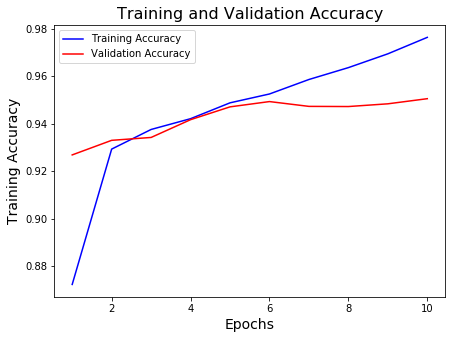

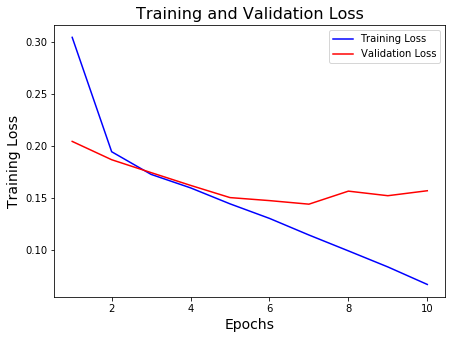

In [57]:
plot_accuracy_loss(cnn_history)

In [33]:
valid_generator = generate_data(Xt,Yt,batch_size,do_shuffle=False)
pred = cnn.predict(valid_generator,verbose=1,steps=spev)

464/464 [==============================] - 57s 124ms/step


In [34]:
pred = np.rint(pred)

<function confusion_matrix at 0x7f900d328488>


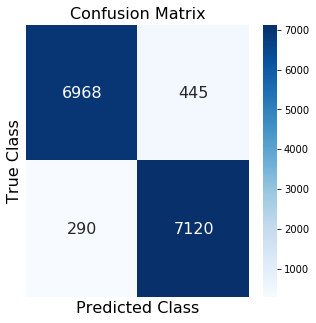

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7413
         1.0       0.94      0.96      0.95      7410

    accuracy                           0.95     14823
   macro avg       0.95      0.95      0.95     14823
weighted avg       0.95      0.95      0.95     14823



In [35]:
create_confusion_matrix(Yt,pred)

In [36]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 196, 196, 32)      18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 16)      4624      
_________________________________________________________________
flatten_3 (Flatten)          (None, 602176)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 602177    
Total params: 627,057
Trainable params: 627,057
Non-trainable params: 0
_________________________________________________________________
